# **WATER POTABILITY APP - FEATURE_ENGINEERING**

## Objectives

* Create derived features through feature engineering

* Perform dimensionality reduction using PCA

* Select optimal features for modeling

## Inputs

*  Processed dataset: data/water_potability_processed.csv

## Outputs

* Engineered feature dataset: data/water_potability_engineered.csv

* PCA transformation object: models/pca_transformer.pkl

* Feature importance rankings (saved as CSV)

## Additional Comments

* Creates interaction terms and ratio features

* Includes ANOVA-based feature selection

* Documents variance explained by principal components


---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability\\water-potability\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability\\water-potability'

# Set Data Directory

### Initial Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Load data
df = pd.read_csv("../data/water_potability.csv")
df = df.dropna()

### Feature Creation

In [5]:
df['ph_Hardness'] = df['ph'] * df['Hardness']
df['Solids_Chloramines'] = df['Solids'] / (df['Chloramines'] + 1e-6)

df['TDS_Conductivity'] = df['Solids'] / (df['Conductivity'] + 1e-6)
df['Organic_Carbon_ratio'] = df['Organic_carbon'] / (df['Trihalomethanes'] + 1e-6)

### Feature Selection

In [6]:
# ANOVA feature selection
X = df.drop('Potability', axis=1)
y = df['Potability']

selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Display feature scores
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores.sort_values('Score', ascending=False).style.background_gradient(cmap='viridis')

,Feature,Score
10,Solids_Chloramines,7.519411
11,TDS_Conductivity,3.378468
2,Solids,3.329175
8,Turbidity,1.034145
3,Chloramines,0.868179
6,Organic_carbon,0.486964
5,Conductivity,0.482512
4,Sulfate,0.470591
0,ph,0.424234
7,Trihalomethanes,0.171691


### Dimensionality Reduction

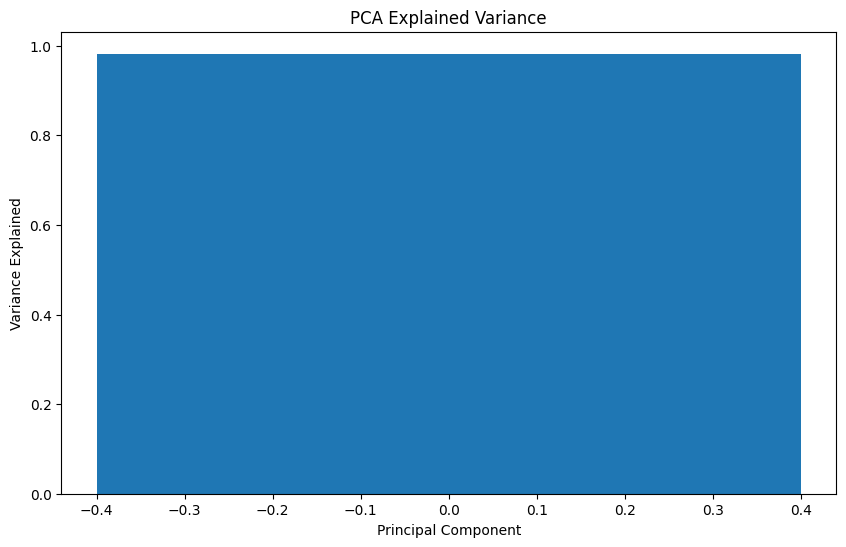

Original features: 13, Polynomial features: 91


In [7]:
# PCA Analysis
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance')
plt.show()

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
print(f"Original features: {X.shape[1]}, Polynomial features: {X_poly.shape[1]}")

---

# Section 2

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push Generated/new files from this section to your Github Repo

* Git add .

In [8]:
!git add .

* Git commit

In [9]:
!git commit -m "Aded Feature_Engineering notebook"

[main 7fcac1c] Aded Feature_Engineering notebook
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename jupyter_notebooks/{Feature_Experimenting.ipynb => Feature_Engineering.ipynb} (100%)


* Git push

In [10]:
!git push origin main

To https://github.com/Ovundiano/water-potability.git
   da16642..7fcac1c  main -> main


In [13]:
import os

output_dir = 'outputs'

try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"✅ Output directory '{output_dir}' is ready for use.")
except Exception as e:
    print(f"❌ Failed to create output directory: {e}")


✅ Output directory 'outputs' is ready for use.
